In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

In [53]:
#importing data
data = datasets.load_diabetes()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


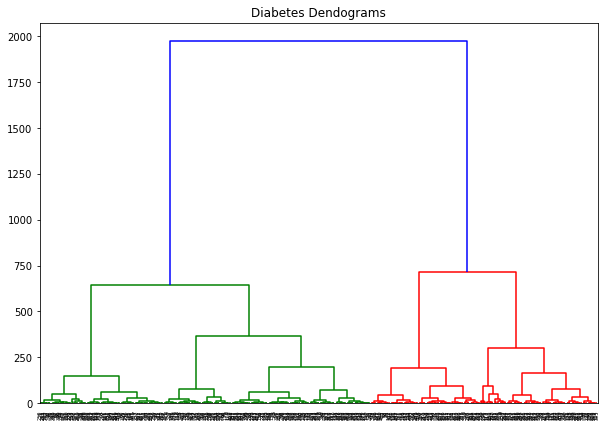

In [59]:
plt.figure(figsize=(10,7))
plt.title("Diabetes Dendograms")
dend = dendrogram(linkage(df, method = 'ward'))

As can be seen from the dendrogram you can have 2, 4, and 5 clusters. How do I know that? I draw a horizontal line and the amount of times my horizontal lines intersects vertical lines corresponds to the amount of clusters. 

## Problem 1
To evaluate the quality of cluster we will use th Sum of Square Error. Meaning that we will plot the SSE for 2, 3, 4, 5, and 10 clusters. This is what we are doing bellow.

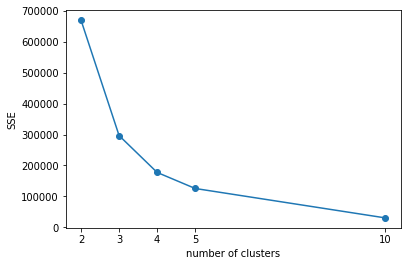

In [55]:
from sklearn.cluster import KMeans
ks = [2,3,4,5,10]
SSE = []

for k in ks:
    
    model = KMeans(n_clusters=k)   
    model.fit(df)

    # Append the inertia to the list of inertias
    SSE.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, SSE, '-o')
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

As can be seen, if you increase the amount of clusters past 5 the SSE doesn't go down drastically. I would probably stick to 4 or 5 clusters, so we won't overfit the model.

What measure might you use to validate your clustering against the target attribute that
was excluded?

Sum of square error because the problem is of thee regression type

Execute hierarchical clustering with single, complete, average, and Wards’ distance
Graph the dendrogram for each linkage.
Which linkage do you prefer for your results? Why?
What is a reasonable number of clusters for the selected linkage? 

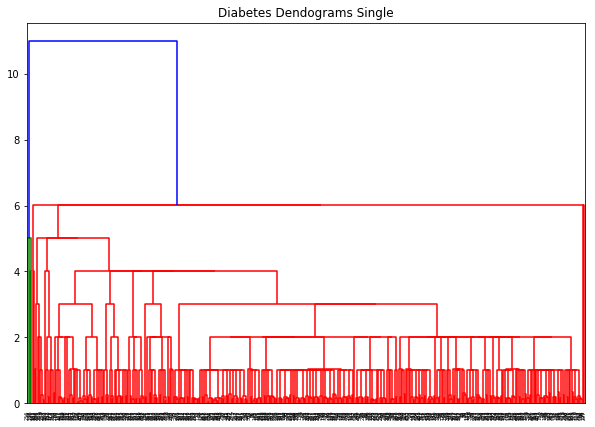

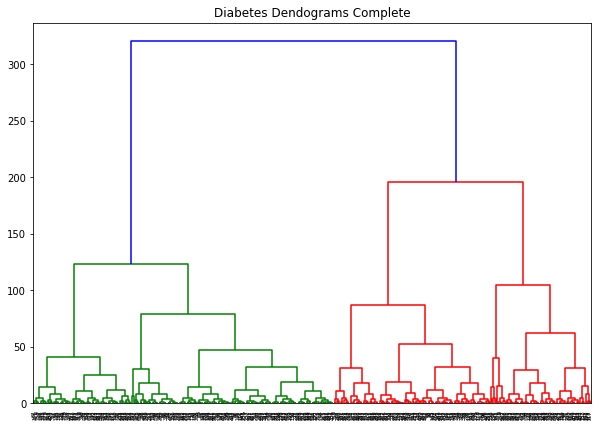

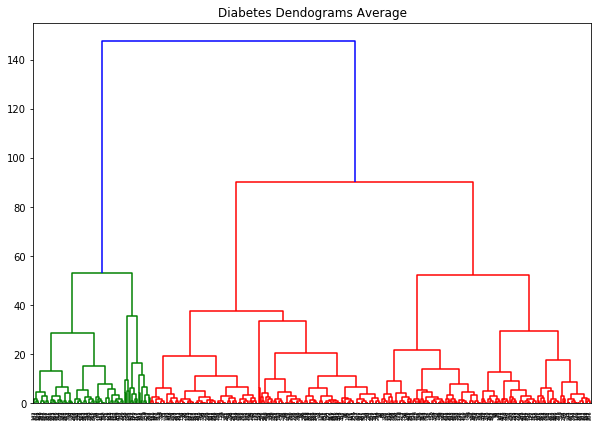

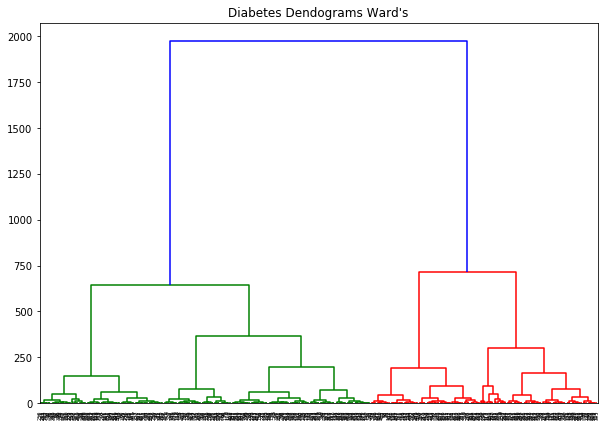

In [71]:
#single
plt.figure(figsize=(10,7))
plt.title("Diabetes Dendograms Single")
linkage_s = linkage(df, method = 'single')
dend_s = dendrogram(linkage_s)

#complete
plt.figure(figsize=(10,7))
plt.title("Diabetes Dendograms Complete")
linkage_c = linkage(df, method = 'complete')
dend_c = dendrogram(linkage_c)

#average
plt.figure(figsize=(10,7))
plt.title("Diabetes Dendograms Average")
linkage_a = linkage(df, method = 'average')
dend_a = dendrogram(linkage_a)

#Ward's
plt.figure(figsize=(10,7))
plt.title("Diabetes Dendograms Ward's")
linkage_w = linkage(df, method = 'ward')
dend_w = dendrogram(linkage_w)

Single doesn't seem very interpretable, so might prefer to ignore it. Let's see what happends later though. Let's how fit te models.

Now we wil fit the differenct clusters

In [105]:
from scipy.cluster.hierarchy import fcluster

cluster_s = fcluster(linkage_s, t=1.5, criterion='distance')

cluster_c = fcluster(linkage_c, t=1.5, criterion='distance')

cluster_a = fcluster(linkage_a, t=1.5, criterion='distance')

cluster_w = fcluster(linkage_w, t=1.5, criterion='distance')

from sklearn import metrics

homogeneity=metrics.homogeneity_score(df['target'], cluster_s) 
completeness=metrics.completeness_score(df['target'], cluster_s)

print ("Single homogeneity score is:",round(homogeneity,3),"completeness score is:",round(completeness,3))

homogeneity=metrics.homogeneity_score(df['target'], cluster_c) 
completeness=metrics.completeness_score(df['target'], cluster_c)

print ("Complete homogeneity score is:",round(homogeneity,3),"completeness score is:",round(completeness,3))

homogeneity=metrics.homogeneity_score(df['target'], cluster_a) 
completeness=metrics.completeness_score(df['target'], cluster_a)

print ("Average homogeneity score is:",round(homogeneity,3),"completeness score is:",round(completeness,3))

homogeneity=metrics.homogeneity_score(df['target'], cluster_w) 
completeness=metrics.completeness_score(df['target'], cluster_w)

print ("Ward's homogeneity score is:",round(homogeneity,3),"completeness score is:",round(completeness,3))


Single homogeneity score is: 0.656 completeness score is: 1.0
Complete homogeneity score is: 0.906 completeness score is: 1.0
Average homogeneity score is: 0.891 completeness score is: 1.0
Ward's homogeneity score is: 0.955 completeness score is: 1.0


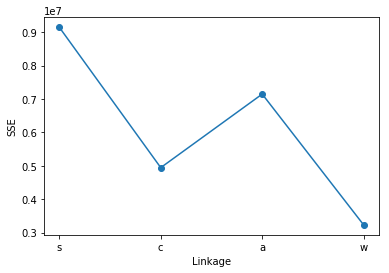

In [106]:
#Since this is a regression problem se will compare them throught the SSE
target = df['target'].values

SSE_s = np.sum((target[:]-cluster_s[:])**2)
SSE_c = np.sum((target[:]-cluster_c[:])**2)
SSE_a = np.sum((target[:]-cluster_a[:])**2)
SSE_w = np.sum((target[:]-cluster_w[:])**2)

SSE = [SSE_s, SSE_c, SSE_a, SSE_w]
linkage = ['s', 'c', 'a', 'w']

# Plot SSE vs linkage
plt.plot(linkage, SSE, '-o')
plt.xlabel('Linkage')
plt.ylabel('SSE')
plt.show()

Everything to me seems to indicate that the best linkage would be the Ward's Linkage. Everything seems to be more "beautiful" even my left eyes seemed to cry a bit. The Dendogram look's better, the homogeneity and completeness as well. We could say that we compared all linkages by using the difference of square error, since the problem is of the regression type.

No for the selection of the number of clusters we need to use the dendogram. We create an imaginary horizonatal line and so on, just like it was explained above. I would repeat that the best option is probably 4 or 5 clusters.